In [4]:
from fluidfoam.readpostpro import readprobes
import os
import importlib.resources

from ntrfc.cascade_case.solution import GenericCascadeCase


casedir =  importlib.resources.files("ntrfc") / "data/openfoam_probedata"

case = GenericCascadeCase(casedir)
variables = os.listdir(case.case_meta.case_root_directory / "postProcessing/probes/0")

probes_loc, time, u = readprobes(case.case_meta.case_root_directory, time_name = 'mergeTime', name = "U")
_, _, rho = readprobes(case.case_meta.case_root_directory, time_name = 'mergeTime', name = "rho")
_, _, p = readprobes(case.case_meta.case_root_directory, time_name = 'mergeTime', name = "p")
_, _, T = readprobes(case.case_meta.case_root_directory, time_name = 'mergeTime', name = "T")

valuedicts = []
for i in range(len(probes_loc)):
    valuedicts.append({"U":u[:,i], "rho":rho[:,i], "p":p[:,i], "T":T[:,i]})
    case.probes.add_probe(probes_loc[i], valuedicts[i],"line",time)


Reading file /home/many/PycharmProjects/NTRfC/ntrfc/data/openfoam_probedata/postProcessing/probes/0/U
10 probes over 359 timesteps
Reading file /home/many/PycharmProjects/NTRfC/ntrfc/data/openfoam_probedata/postProcessing/probes/0.00943924517741/U
10 probes over 310 timesteps
Reading file /home/many/PycharmProjects/NTRfC/ntrfc/data/openfoam_probedata/postProcessing/probes/0/rho
10 probes over 359 timesteps
Reading file /home/many/PycharmProjects/NTRfC/ntrfc/data/openfoam_probedata/postProcessing/probes/0.00943924517741/rho
10 probes over 310 timesteps
Reading file /home/many/PycharmProjects/NTRfC/ntrfc/data/openfoam_probedata/postProcessing/probes/0/p
10 probes over 359 timesteps
Reading file /home/many/PycharmProjects/NTRfC/ntrfc/data/openfoam_probedata/postProcessing/probes/0.00943924517741/p
10 probes over 310 timesteps
Reading file /home/many/PycharmProjects/NTRfC/ntrfc/data/openfoam_probedata/postProcessing/probes/0/T
10 probes over 359 timesteps
Reading file /home/many/PycharmPro

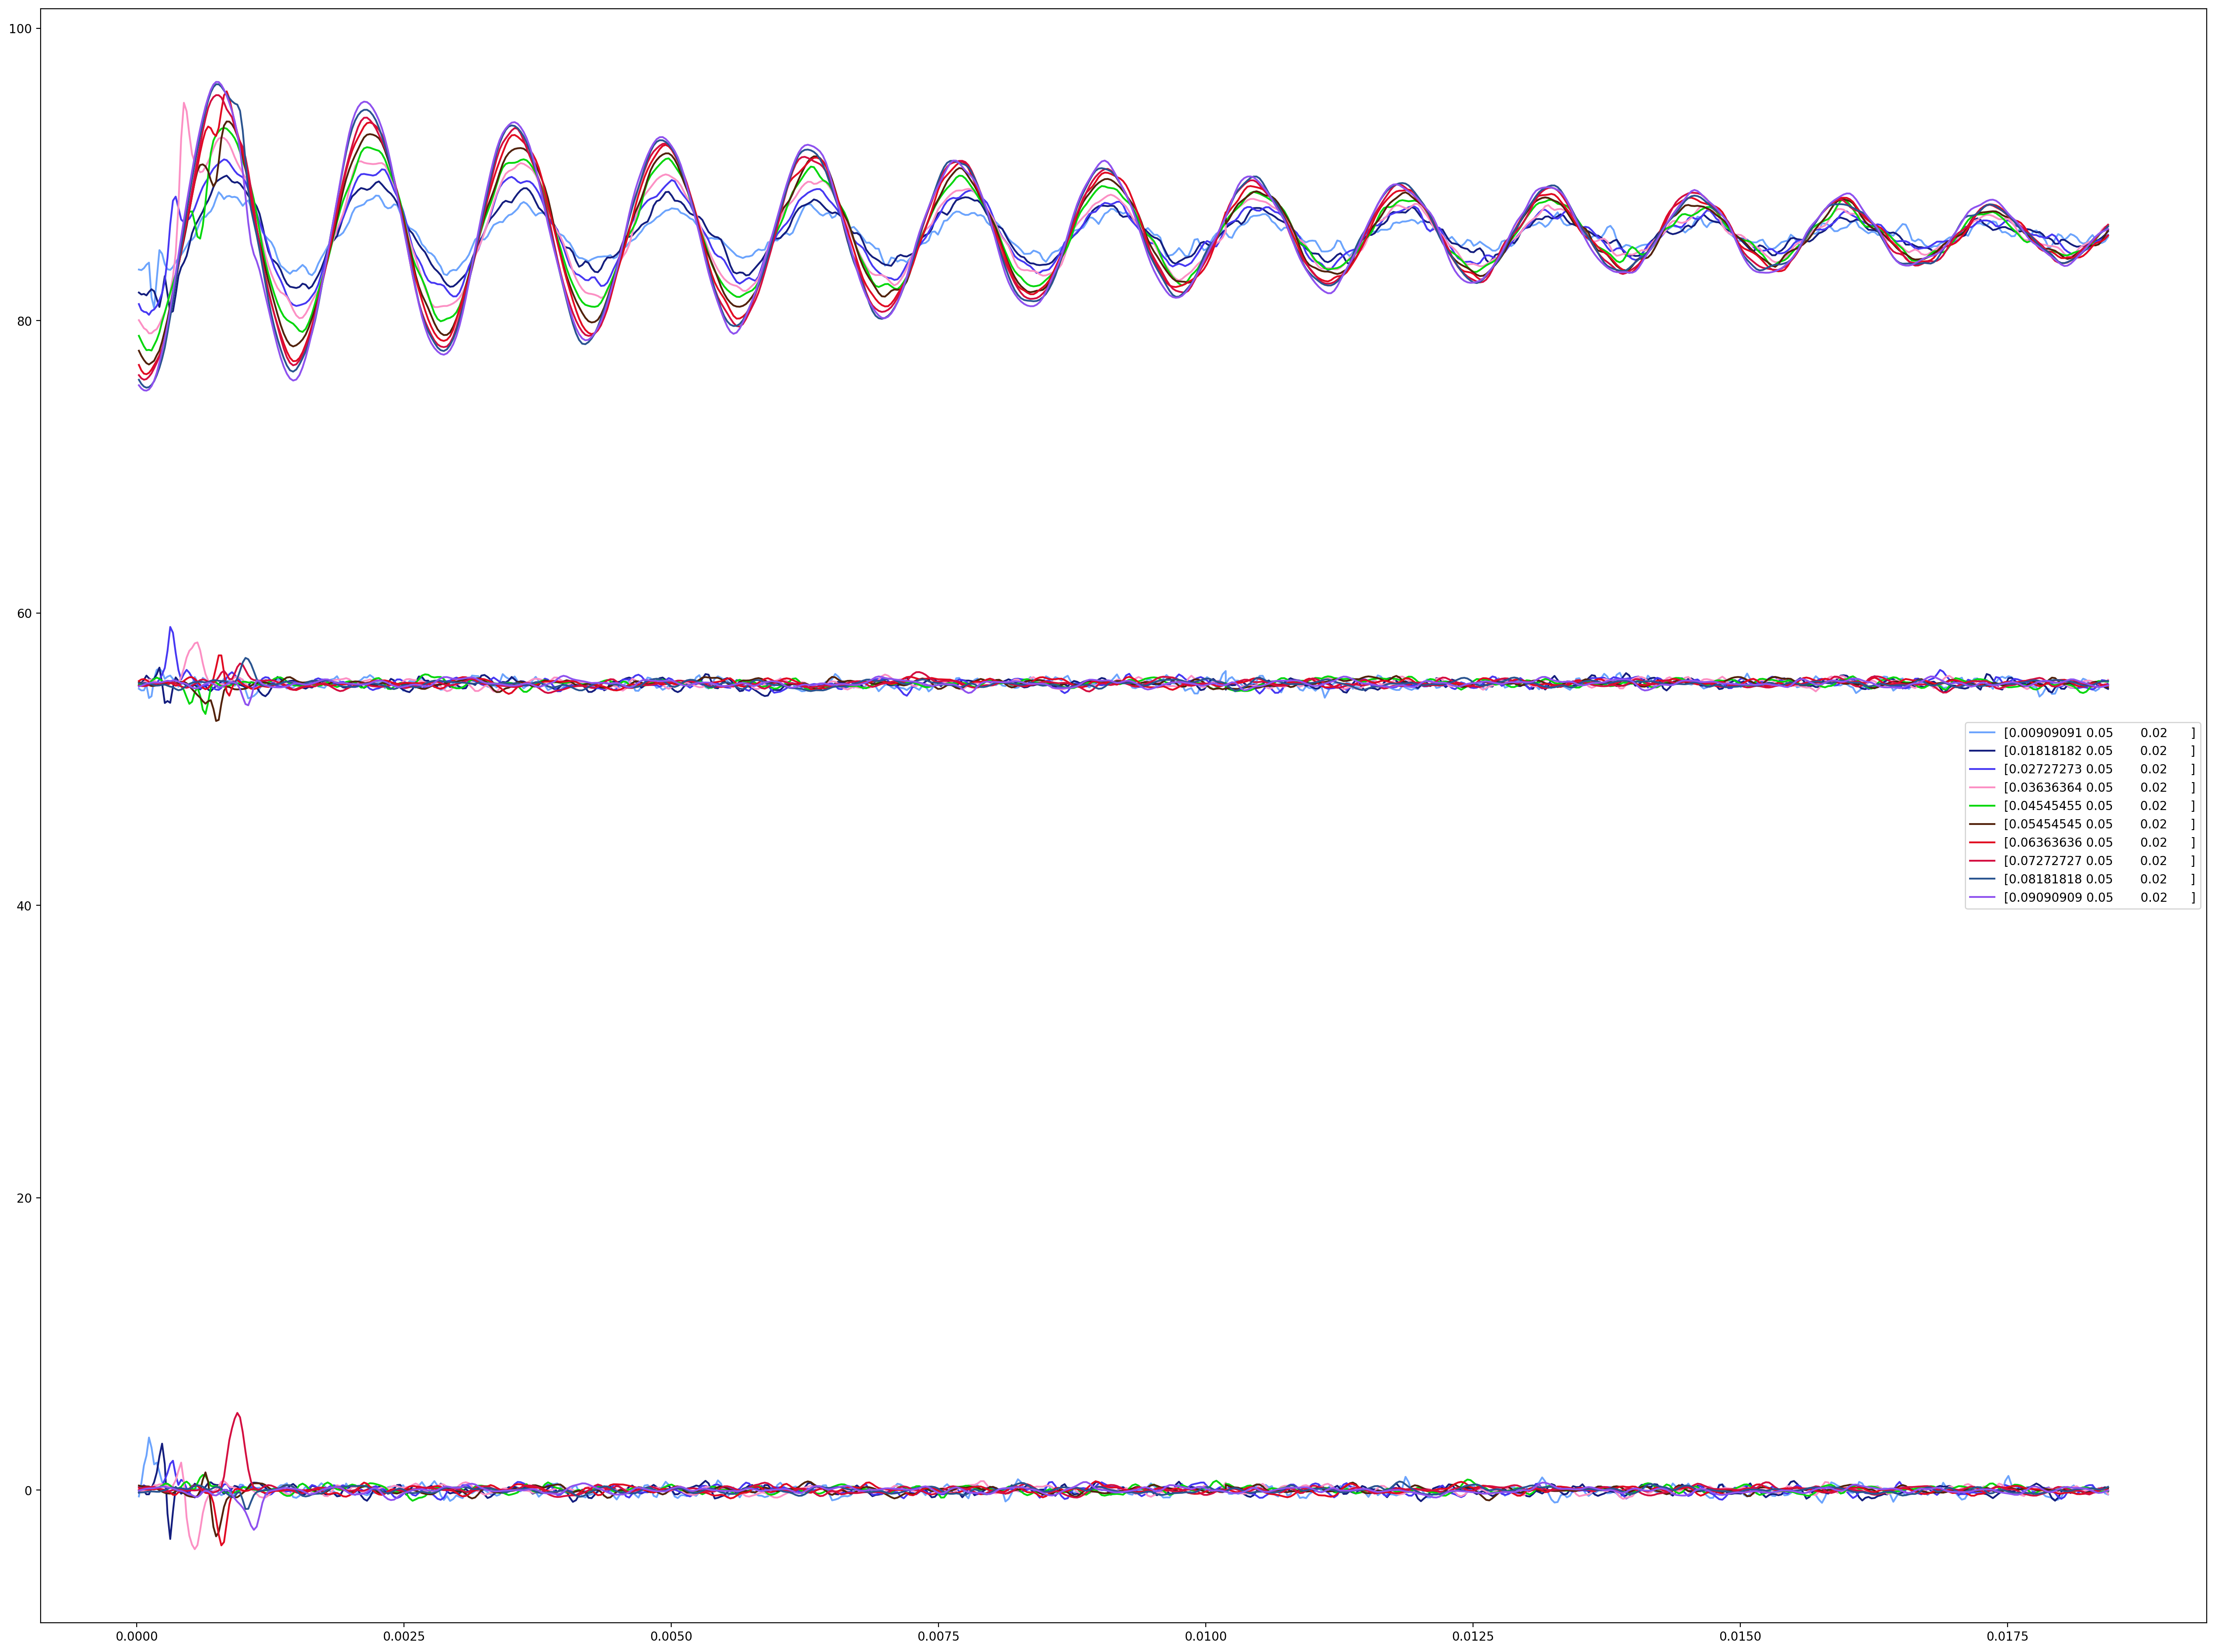

In [6]:
case.probes.plot_probes(value="U")
